In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('INNHotelsGroup_pastdata.csv')
df.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [5]:
df['market_segment_type'].value_counts()

market_segment_type
Online     18456
Offline     8637
Name: count, dtype: int64

In [6]:
df['booking_status'].value_counts()

booking_status
Not Canceled    18236
Canceled         8857
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
def convert(date_time):
    format= '%Y-%m-%d'
    datetime_str = datetime.datetime.strptime(date_time,format)
    return datetime_str

In [9]:
import datetime

df['arrival_date_format']=df['arrival_date'].apply(lambda x:convert(x))

In [10]:
df['month']=df['arrival_date_format'].apply(lambda x:x.month)

In [11]:
df['weekday']=df['arrival_date_format'].apply(lambda x:x.weekday())

In [12]:
df.tail()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_date_format,month,weekday
27088,INNHG_128122,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled,Yes,2022-06-30,6,3
27089,INNHG_128123,11,Online,1,139.00,2,0,2022-06-30,0,3,Canceled,No,2022-06-30,6,3
27090,INNHG_128124,35,Online,0,117.90,2,0,2022-06-30,0,3,Canceled,No,2022-06-30,6,3
27091,INNHG_128125,68,Online,1,131.40,2,0,2022-06-30,0,2,Canceled,No,2022-06-30,6,3
27092,INNHG_128126,158,Online,1,90.95,2,1,2022-06-30,0,3,Canceled,No,2022-06-30,6,3


C:\Users\Amizh\AppData\Local\Temp\ipykernel_20076\3454267504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['lead_time'])


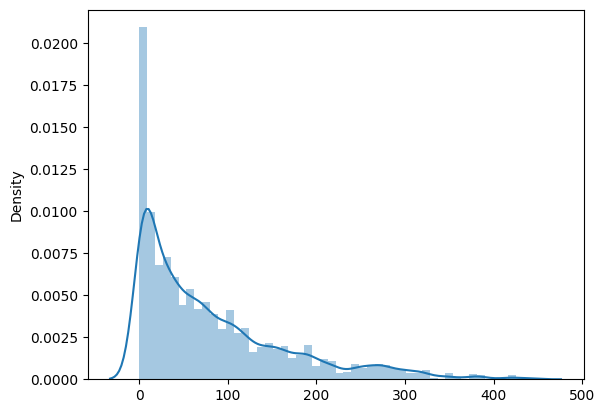

In [13]:
sns.distplot(x=df['lead_time'])
plt.show()

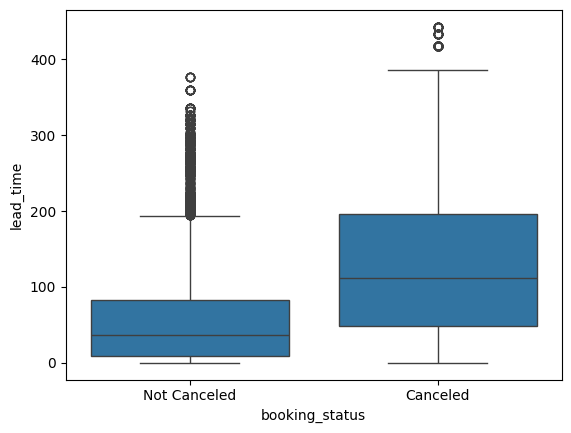

In [14]:
sns.boxplot(data=df,x='booking_status',y='lead_time')
plt.show()

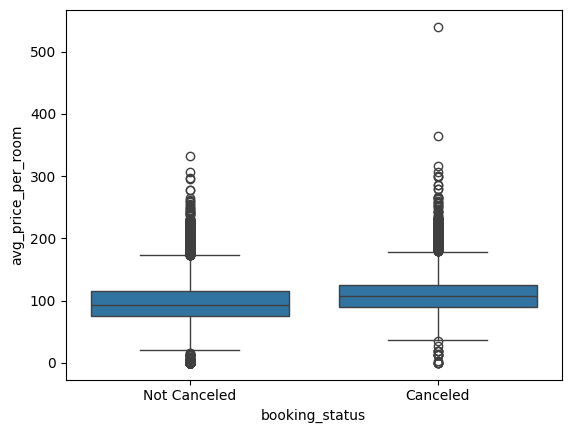

In [15]:
sns.boxplot(data=df,x='booking_status',y='avg_price_per_room')
plt.show()

In [16]:
seg_type=df.groupby(['booking_status','market_segment_type'])['booking_id'].count().reset_index()
seg_type

,booking_status,market_segment_type,booking_id
0,Canceled,Offline,2589
1,Canceled,Online,6268
2,Not Canceled,Offline,6048
3,Not Canceled,Online,12188


In [17]:
seg_type_tr=seg_type.pivot(columns='market_segment_type',index='booking_status')
seg_type_tr

booking_id       
market_segment_type    Offline Online
booking_status                       
Canceled                  2589   6268
Not Canceled              6048  12188

<Axes: xlabel='booking_status'>

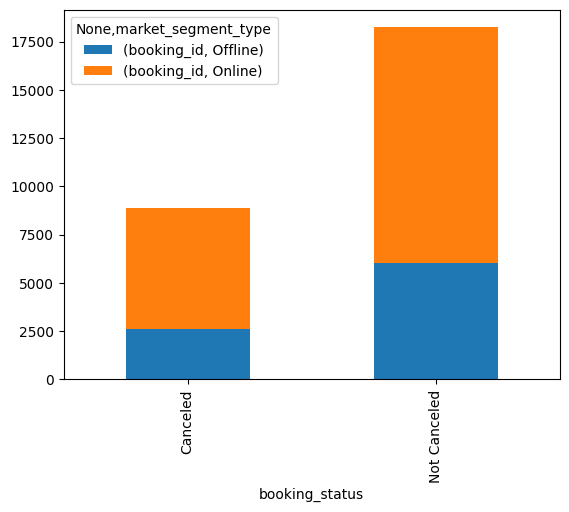

In [18]:
seg_type_tr.plot(kind='bar',stacked=True)

In [19]:
seg_type2=df.groupby(['booking_status','month'])['booking_id'].count().reset_index()
seg_type2

,booking_status,month,booking_id
0,Canceled,1,582
1,Canceled,2,1037
2,Canceled,3,1690
3,Canceled,4,1846
4,Canceled,5,1329
5,Canceled,6,1390
6,Canceled,7,243
7,Canceled,8,185
8,Canceled,9,182
9,Canceled,10,302


<Axes: xlabel='month'>

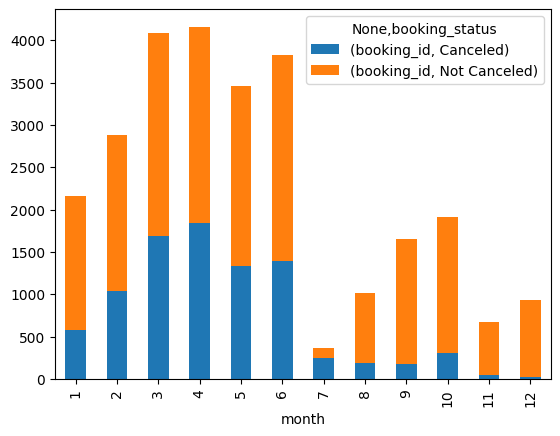

In [20]:
seg_type2.pivot(columns='booking_status',index='month').plot(kind='bar',stacked=True)

In [21]:
train=df.drop(columns=['booking_id','arrival_date','rebooked','booking_status','arrival_date_format'],axis=1)
train

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,month,weekday
0,0,Online,0,85.03,1,1,0,0,1,4
1,34,Online,2,125.10,2,2,0,0,1,4
2,24,Online,1,71.69,2,2,0,0,1,4
3,23,Online,0,84.70,1,2,0,0,1,4
4,46,Online,1,149.40,2,2,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...
27088,113,Offline,0,85.00,2,1,0,3,6,3
27089,11,Online,1,139.00,2,0,0,3,6,3
27090,35,Online,0,117.90,2,0,0,3,6,3
27091,68,Online,1,131.40,2,0,0,2,6,3


In [22]:
train.dtypes

lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
required_car_parking_space      int64
no_of_week_nights               int64
month                           int64
weekday                         int64
dtype: object

In [23]:
train['month']=train['month'].astype('category')
train['weekday']=train['weekday'].astype('category')
#train['weekday']=train['wekday'].astype('category')

In [24]:
train.dtypes

lead_time                        int64
market_segment_type             object
no_of_special_requests           int64
avg_price_per_room             float64
no_of_adults                     int64
no_of_weekend_nights             int64
required_car_parking_space       int64
no_of_week_nights                int64
month                         category
weekday                       category
dtype: object

In [25]:
x_dummies=pd.get_dummies(train,drop_first=True)
x_dummies

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,market_segment_type_Online,month_2,month_3,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,85.03,1,1,0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,34,2,125.10,2,2,0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,24,1,71.69,2,2,0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,23,0,84.70,1,2,0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,46,1,149.40,2,2,0,3,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,113,0,85.00,2,1,0,3,False,False,False,...,False,False,False,False,False,False,True,False,False,False
27089,11,1,139.00,2,0,0,3,True,False,False,...,False,False,False,False,False,False,True,False,False,False
27090,35,0,117.90,2,0,0,3,True,False,False,...,False,False,False,False,False,False,True,False,False,False
27091,68,1,131.40,2,0,0,2,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [26]:
y=df['booking_status']

In [27]:
y.replace("Canceled",1,inplace=True)
y.replace("Not Canceled",0, inplace=True)

In [28]:
y

0        0
1        0
2        0
3        0
4        1
        ..
27088    1
27089    1
27090    1
27091    1
27092    1
Name: booking_status, Length: 27093, dtype: int64

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [30]:
rf= RandomForestClassifier(n_estimators=500, random_state=1)
params= {
    "max_depth": [10,20,30],
    "min_samples_split":[5,10],
    "max_features": [5,8]
}

In [31]:
rf_cv= GridSearchCV(estimator= rf,
                    param_grid= params,
                    cv=3,
                    verbose=1,
                    scoring="accuracy"
)

In [32]:
rf_cv.fit(x_dummies,y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500, random_state=1),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [5, 8],
                         'min_samples_split': [5, 10]},
             scoring='accuracy', verbose=1)

In [33]:
rf_cv.best_params_

{'max_depth': 10, 'max_features': 8, 'min_samples_split': 5}

In [34]:
rf_cv.best_score_

0.6976709851253092

In [35]:
rf_final = RandomForestClassifier(n_estimators=100,min_samples_split=5,max_features=8, max_depth=10, random_state=1).fit(x_dummies,y)

In [36]:
rf_final.feature_importances_

array([0.41406538, 0.12874829, 0.16912838, 0.03374549, 0.03045555,
       0.00821878, 0.02733574, 0.07777108, 0.00705044, 0.00593177,
       0.01365408, 0.00480343, 0.00591128, 0.01028336, 0.00244964,
       0.01144311, 0.01265531, 0.00124525, 0.0114427 , 0.0037997 ,
       0.00549805, 0.00270028, 0.00318992, 0.00394162, 0.00453136])

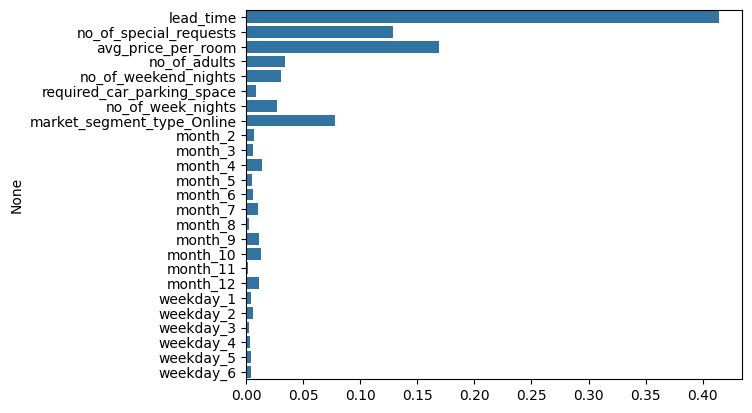

In [37]:
ax = sns.barplot(x=rf_final.feature_importances_, y=x_dummies.columns)

In [38]:
gbt= GradientBoostingClassifier(n_estimators= 500, random_state=1)
params= {
    "max_depth": [10,20,30],
    "learning_rate": [0.1, 0.3]
}

gbt_cv= GridSearchCV(estimator= gbt,
                    param_grid= params,
                    cv=3,
                    verbose=1,
                    scoring="accuracy"
)

gbt_cv.fit(x_dummies,y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
gbt_cv.best_params_, gbt_cv.best_score_

({'learning_rate': 0.1, 'max_depth': 20}, 0.6858598161886835)